In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stc

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [3]:
cc = pd.read_excel('Country-Code.xlsx')

In [4]:
merged = pd.merge(data,cc,on='Country Code',how='left')
merged.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [6]:
merged.isna().sum()
#merged.isnull().sum() #total number of null entries per column

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
#Since the restaurant name is missing, we dropped the record and reset the index.
merged.dropna(axis=0,subset=['Restaurant Name'],inplace=True)

In [8]:
merged[merged['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9083,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9086,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9094,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9406,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9494,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9504,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9533,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9535,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9539,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [9]:
#Since there were only 9 records without cuisines, we have replace the null values with Others.
merged['Cuisines'].fillna('Others',inplace=True)

In [10]:
#duplicate data finding
duplicateRowsDF = merged[merged.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []


# EDA-1
Explore the geographical distribution of the restaurants

Finding out the cities with maximum / minimum number of restaurants

In [11]:
country_distri = merged.groupby(['Country Code','Country']).agg( Count = ('Restaurant ID','count'))
country_distri.sort_values(by='Count',ascending=False)

,,Count
Country Code,Country,
1,India,8651
216,United States,434
215,United Kingdom,80
30,Brazil,60
189,South Africa,60
214,UAE,60
148,New Zealand,40
208,Turkey,34
14,Australia,24


<AxesSubplot:ylabel='Country Code,Country'>

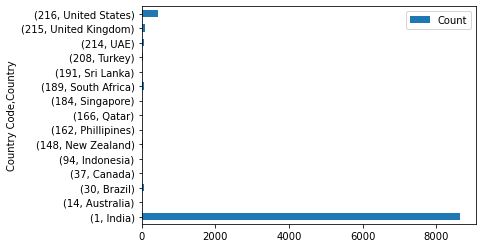

In [12]:
country_distri.plot(kind='barh')

In [13]:
city_dist = merged.groupby(['Country','City']).agg(Count = ('Restaurant ID','count'))
city_dist.describe()

,Count
count,141.000000
mean,67.730496
std,476.723952
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


In [14]:
city_dist.sort_values(by='Count',ascending=False)
# New Delhi has maximum number of restaurant

Count
Country       City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[141 rows x 1 columns]

In [15]:
# Minimum number of restaurant in following cities 
min_cnt_rest = city_dist[city_dist['Count']==1]
min_cnt_rest.info()
min_cnt_rest

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46 entries, ('Australia', 'Armidale') to ('United States', 'Winchester Bay')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   46 non-null     int64
dtypes: int64(1)
memory usage: 1.8+ KB


Count
Country       City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Miller                1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [16]:
# Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking
merged1 = merged.copy()
merged1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [17]:
dummy = ['Has Table booking','Has Online delivery']
merged1 = pd.get_dummies(merged1,columns=dummy,drop_first=True)
merged1.head()
# 0 indicates 'NO'
# 1 indicates 'YES'

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Has Table booking_Yes,Has Online delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


In [19]:
#Ration between restaurants allowing table booking and those which dont
tbl_book_y = merged1[merged1['Has Table booking_Yes']==1]['Restaurant ID'].count()
tbl_book_n = merged1[merged1['Has Table booking_Yes']==0]['Restaurant ID'].count()
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ',
      round((tbl_book_y/tbl_book_n),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.14


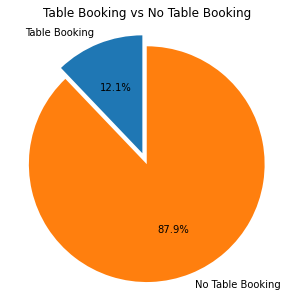

In [20]:
#Pie chart to show percentage of restaurants which allow table booking and those which don't
labels = 'Table Booking', 'No Table Booking'
sizes = [tbl_book_y,tbl_book_n]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Table Booking vs No Table Booking")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [22]:
# Find out the percentage of restaurants providing online delivery
order_on = merged1[merged1['Has Online delivery_Yes'] == 1]['Restaurant ID'].count()
order_off = merged1[merged1['Has Online delivery_Yes'] == 0]['Restaurant ID'].count()
print('Percentage of restaurants providing online delivery : {} %'.format((round(order_on/len(merged1),3)*100)))

Percentage of restaurants providing online delivery : 25.7 %


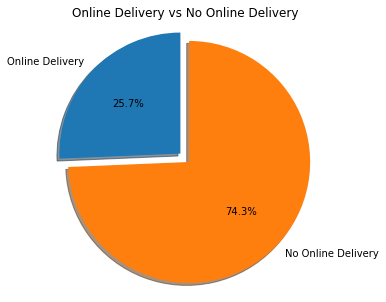

In [22]:
#pie chart to show percentages of restaurants allowing online delivery vs those which do not have online delivery
labels = 'Online Delivery','No Online Delivery'
size = [order_on,order_off]
explode = (0.1,0)
fig1,ax1 = plt.subplots(figsize=(5,5))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title("Online Delivery vs No Online Delivery")
ax1.axis('equal')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Votes'>

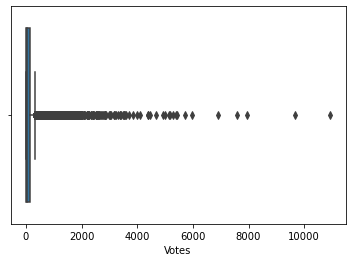

In [23]:
sns.boxplot(merged['Votes'])

In [24]:
# Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver
# first detect and remove (replace it with mean/closest possible value) outlier for VOTE
import sklearn
import pandas as pd
 
''' Detection '''
# IQR
Q1 = np.percentile(merged['Votes'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(merged['Votes'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", merged.shape)
 
# Upper bound
upper = np.where(merged['Votes'] >= (Q3+1.5*IQR))
#print("Upper bound:",upper)
#print(np.where(upper))
# Lower bound
lower = np.where(merged['Votes'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
merged.drop(upper[0], inplace = True)
merged.drop(lower[0], inplace = True)
 
print("New Shape: ", merged.shape)


Old Shape:  (9550, 20)
New Shape:  (8423, 20)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Cost for two'>

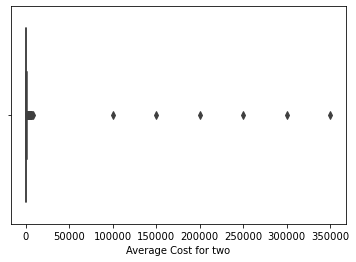

In [65]:
sns.boxplot(merged['Average Cost for two'])

In [27]:
import sklearn
import pandas as pd
 
''' Detection '''
# IQR
Q1 = np.percentile(merged['Average_Cost_for_two'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(merged['Average_Cost_for_two'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", merged.shape)
 
# Upper bound
upper = np.where(merged['Average_Cost_for_two'] >= (Q3+1.5*IQR))
print("Upper bound:",upper)
print(np.where(upper))
# Lower bound
lower = np.where(merged['Average_Cost_for_two'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
merged.drop(upper[0], inplace = True)
merged.drop(lower[0], inplace = True)
 
print("New Shape: ", merged.shape)

Old Shape:  (8423, 20)
Upper bound: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 

KeyError: '[  0   1   2   3   5   7   9  11  12  13  14  15  17  19  20  23  24  30\n  31  34  40  43  47  48  52  56  57  60  67  76  85  97  99 104 108 111\n 112 120 131 135 145 153 154 160 161 165 166 176 177 178 189 197 198 205\n 209 211 212 213 218 219 220 221 223 224 229 230 231 232 233 237 239 247\n 249 250 254 256 257 258 259 261 262 263 264 265 266 267 268 269 270 271\n 275 280 282 284 288 290 294 295 296 297 300 307 314 315 316 318 319 321\n 324 332 336 358 361 362 369 372 373 374 376 379 380 381 382 388 389 390\n 392 396 404 406 407 408 409 410 411 412 418 419 420 421 422 423 426 432\n 433 434 436 437 438 440 443 447 448 449 451 453 454 455 457 458 460 463\n 470 471 472 476 477 478 479 480 482 485 486 489 492 494 496 497 499 501\n 504 511 513 514 518 519 520 521 522 531 532 533 534 535 536 537 538 539\n 540 542 543 546 547 549 550 551 552 553 555 557 558 561 562 563 566 567\n 569 570 572 573 576 578 579 580 582 583 584 586 589 590 591 592 593 601\n 602 603 608 609 610 611 613 615 623 631 632 633 634 635 639 643 644 647\n 648 649 651 657 658 663 664 665 666 667 672 674] not found in axis'

array([[<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

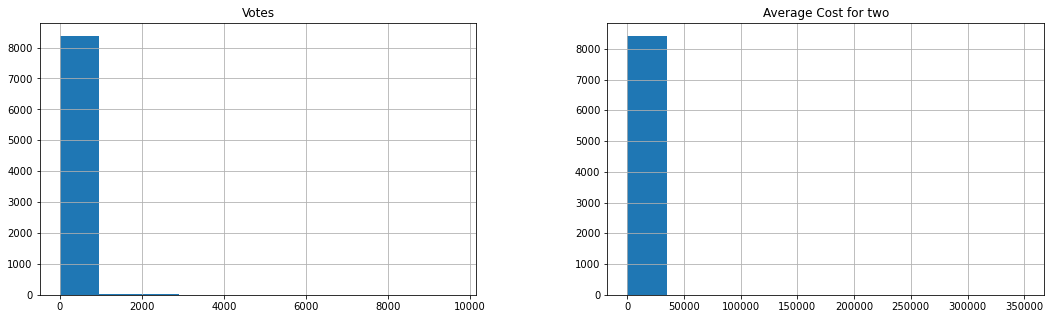

In [27]:
merged.hist(['Votes', 'Average Cost for two'], figsize=(18,5))

<AxesSubplot:xlabel='Votes', ylabel='Has Online delivery'>

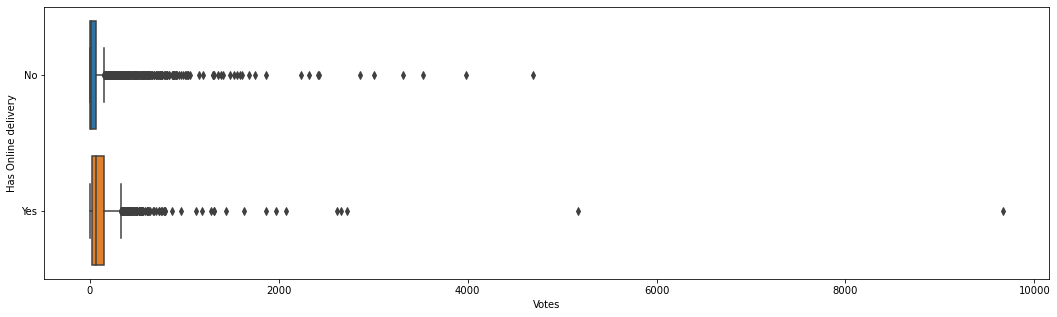

In [28]:
dimen=(18,5)
fig, ax = plt.subplots(figsize=dimen)
sns.boxplot(x='Votes',y='Has Online delivery',data=merged,ax=ax)

In [29]:
rest_deliver = merged1[merged1['Has Table booking_Yes'] == 1]['Votes'].sum()
rest_ndeliver = merged1[merged1['Has Table booking_Yes'] == 0]['Votes'].sum()
print('Difference in number of votes for restaurants that deliver and dont deliver: ',abs((rest_deliver - rest_ndeliver)))

Difference in number of votes for restaurants that deliver and dont deliver:  680082


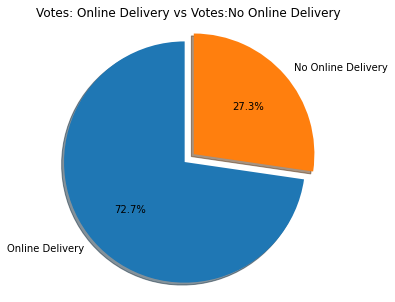

In [30]:
labels = 'Online Delivery','No Online Delivery'
size = [rest_ndeliver,rest_deliver]
explode = (0,0.1)
fig1,ax1 = plt.subplots(figsize=(5,5))
ax1.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.set_title("Votes: Online Delivery vs Votes:No Online Delivery")
ax1.axis('equal')
plt.show()
#out of the total votes about 27.3% votes were given to restaurants that dont have online delivery option
#out of the total votes about 72.7% votes were given to restaurants that dont have online delivery option
#This clearly shows that restaurants that have online delivery are more likely to get a vote(feedback) 

<AxesSubplot:xlabel='City,Cuisines'>

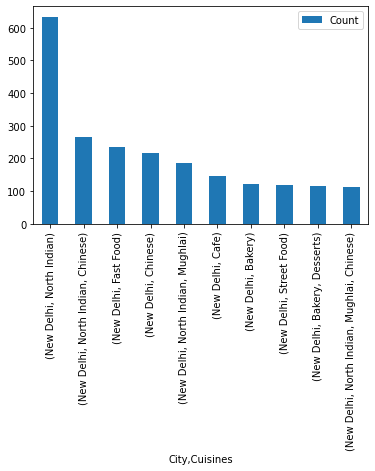

In [31]:
# What are the top 10 cuisines served across cities?
top_10_couisines = merged.groupby(['City','Cuisines']).agg( Count = ('Cuisines','count'))
df=top_10_couisines.sort_values(by='Count',ascending=False)
#top_10_couisines = merged['Cuisines'].value_counts()
#top_10_couisines.head(10)
#top_10_couisines.plot(kind='barh')
df.head(10).plot(kind='bar')

In [33]:
# What is the maximum and minimum number of cuisines that a restaurant serves? 
cuis_count = merged.groupby(['Restaurant Name','Cuisines']).agg( Count = ('Cuisines','count'))
cuis_count.sort_values(by='Count',ascending=False)

Count
Restaurant Name     Cuisines                                       
Cafe Coffee Day     Cafe                                         82
Domino's Pizza      Pizza, Fast Food                             72
Subway              American, Fast Food, Salad, Healthy Food     58
Green Chick Chop    Raw Meats, North Indian, Fast Food           46
McDonald's          Fast Food, Burger                            42
...                                                             ...
Frozen Fantasy      Desserts, Beverages                           1
Frozen Factory      Desserts, Ice Cream                           1
                    Desserts, Beverages                           1
Frozen Adda         Ice Cream, Desserts                           1
Ìàukura€Ùa Sofras€± Kebab, Izgara                                 1

[7044 rows x 1 columns]

In [34]:
# Also, which is the most served cuisine across the restaurant for each city?
cuis_count_ct = merged.groupby(['City','Cuisines']).agg( Count = ('Cuisines','count'))
cuis_count_ct.sort_values(by='Count',ascending=False)

Count
City       Cuisines                                          
New Delhi  North Indian                                   634
           North Indian, Chinese                          267
           Fast Food                                      236
           Chinese                                        217
           North Indian, Mughlai                          187
...                                                       ...
Inner City Tapas                                            1
Indore     North Indian, Mughlai, Seafood                   1
           North Indian, Continental, Mexican, Italian      1
           North Indian, Chinese, South Indian              1
€¡stanbul  World Cuisine, Patisserie, Cafe                  1

[2358 rows x 1 columns]

In [35]:
merged.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [36]:
cuisines = merged['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines

,0,1,2,3,4,5,6,7
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
6,Indonesian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Western,Asian,Cafe,NaN,NaN,NaN,NaN,NaN
10,Korean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Cafe,Coffee and Tea,Western,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cuisines.columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
cuisines.tail()

,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
9546,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9547,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9548,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9549,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9550,Chinese,North Indian,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_cuisines = pd.concat([merged,cuisines],axis=1)
df_cuisines.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
6,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,...,155,Indonesia,Indonesian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",...,259,Indonesia,Western,Asian,Cafe,NaN,NaN,NaN,NaN,NaN
10,18425821,OJJU,94,Jakarta,"Gandaria City, Lantai Upper Ground, Jl. Sultan...","Gandaria City Mall, Gandaria","Gandaria City Mall, Gandaria, Jakarta",106.783162,-6.244221,Korean,...,137,Indonesia,Korean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,22,Indonesia,Cafe,Coffee and Tea,Western,NaN,NaN,NaN,NaN,NaN


In [40]:
cuisine_loc = pd.DataFrame(df_cuisines[['Country','City','Locality Verbose','Cuisine_1','Cuisine_2','Cuisine_3',
                                        'Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])

In [41]:
cuisine_loc_stack=pd.DataFrame(cuisine_loc.stack()) #stacking the columns 
cuisine_loc.head()

,Country,City,Locality Verbose,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
4,Indonesia,Jakarta,"Thamrin, Jakarta",French,Western,NaN,NaN,NaN,NaN,NaN,NaN
6,Indonesia,Tangerang,"Alam Sutera Town Center, Serpong Utara, Tangerang",Indonesian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Indonesia,Jakarta,"Kelapa Gading, Jakarta",Western,Asian,Cafe,NaN,NaN,NaN,NaN,NaN
10,Indonesia,Jakarta,"Gandaria City Mall, Gandaria, Jakarta",Korean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Indonesia,Bandung,"Dago, Bandung",Cafe,Coffee and Tea,Western,NaN,NaN,NaN,NaN,NaN


In [42]:
cuisine_loc_stack.head(10)

0
4 Country                                                   Indonesia
  City                                                        Jakarta
  Locality Verbose                                   Thamrin, Jakarta
  Cuisine_1                                                    French
  Cuisine_2                                                   Western
6 Country                                                   Indonesia
  City                                                      Tangerang
  Locality Verbose  Alam Sutera Town Center, Serpong Utara, Tangerang
  Cuisine_1                                                Indonesian
8 Country                                                   Indonesia

In [43]:
keys = [c for c in cuisine_loc  if c.startswith('Cuisine')]
a=pd.melt(cuisine_loc, id_vars='Locality Verbose', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
a

,Locality Verbose,variable,Cuisines
0,"Thamrin, Jakarta",Cuisine_1,French
1,"Alam Sutera Town Center, Serpong Utara, Tangerang",Cuisine_1,Indonesian
2,"Kelapa Gading, Jakarta",Cuisine_1,Western
3,"Gandaria City Mall, Gandaria, Jakarta",Cuisine_1,Korean
4,"Dago, Bandung",Cuisine_1,Cafe
...,...,...,...
67379,"Jakhan, Dehradun",Cuisine_8,NaN
67380,"Mall Road, Kanpur",Cuisine_8,NaN
67381,"Parade, Kanpur",Cuisine_8,NaN
67382,"Dashaswmedh Road, Varanasi",Cuisine_8,NaN


In [44]:
max_rate=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index())
#find the highest restuarant in the city
max_rate
del max_rate['variable']
max_rate.columns=['Locality Verbose','Cuisines','Count']
max_rate

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"A Hotel, Gurdev Nagar, Ludhiana",North Indian,1
...,...,...,...
9001,"ÌÏmitkÌ_y, Ankara",Kebab,1
9002,"ÌÏmitkÌ_y, Ankara",Desserts,1
9003,"ÌÏmitkÌ_y, Ankara",Turkish Pizza,1
9004,"Ìàukurambar, Ankara",Patisserie,1


In [45]:
#find the highest restuarant in the city
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first()
loc

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"A Hotel, Gurdev Nagar, Ludhiana",Fast Food,1
2,"ARSS Mall, Paschim Vihar, New Delhi",Fast Food,1
3,"Aaya Nagar, New Delhi",Cuisine Varies,1
4,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",American,1
...,...,...,...
1042,"Zoo Tiniali, Guwahati",Chinese,2
1043,"ibis New Delhi, Aerocity, New Delhi",Ice Cream,1
1044,"ÌÅguas Claras, BrasÌ_lia",Grill,1
1045,"ÌÏmitkÌ_y, Ankara",Turkish Pizza,1


In [47]:
rating_res=loc.merge(merged1,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') 
#inner join to merge the two dataframe
rating_res

,Locality Verbose,Cuisines_x,Count,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,...,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Has Table booking_Yes,Has Online delivery_Yes
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road",77.039220,...,800,Indian Rupees(Rs.),2,2.7,Orange,Average,80,India,1,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road",77.039310,...,350,Indian Rupees(Rs.),1,3.4,Orange,Average,16,India,0,0
2,"A Hotel, Gurdev Nagar, Ludhiana",Fast Food,1,15239,Basant Restaurant,1,Ludhiana,"Urban Estate, Main Market, Phase 1, Dugri, Lud...","A Hotel, Gurdev Nagar",75.842739,...,800,Indian Rupees(Rs.),2,3.6,Yellow,Good,93,India,0,0
3,"ARSS Mall, Paschim Vihar, New Delhi",Fast Food,1,310281,Haldiram's,1,New Delhi,"1st Floor, ARSS Mall, Opposite Jwalaheri, Pasc...","ARSS Mall, Paschim Vihar",77.101544,...,500,Indian Rupees(Rs.),2,3.1,Orange,Average,117,India,0,0
4,"Aaya Nagar, New Delhi",Cuisine Varies,1,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,0.000000,...,500,Indian Rupees(Rs.),2,0.0,White,Not rated,2,India,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,"ÌÅguas Claras, BrasÌ_lia",Grill,1,6601515,Rovereto,30,BrasÌ_lia,"Rua 13 Norte, Lote 4, ÌÅguas Claras, BrasÌ_lia",ÌÅguas Claras,-48.019000,...,100,Brazilian Real(R$),4,3.1,Orange,Average,9,Brazil,0,0
9273,"ÌÅguas Claras, BrasÌ_lia",Grill,1,6601602,Taco Pep,30,BrasÌ_lia,"Vila Malls, Avenida das Castanheiras, Lote 106...",ÌÅguas Claras,-48.016667,...,100,Brazilian Real(R$),4,4.3,Green,Very Good,29,Brazil,0,0
9274,"ÌÅguas Claras, BrasÌ_lia",Grill,1,6601361,Buena Carne,30,BrasÌ_lia,"Avenida AraucÌÁrias, 1325, Loja 19, ÌÅguas Cla...",ÌÅguas Claras,-48.019092,...,60,Brazilian Real(R$),3,3.6,Yellow,Good,9,Brazil,0,0
9275,"ÌÏmitkÌ_y, Ankara",Turkish Pizza,1,6000921,DÌ_vero€Ùlu,208,Ankara,"ÌÏmitkÌ_y Mahallesi, 2432. Cadde (8. Cadde), N...",ÌÏmitkÌ_y,32.701775,...,70,Turkish Lira(TL),3,4.2,Green,Very Good,152,Turkey,0,0


In [48]:
df=pd.DataFrame(rating_res[['Country','City','Locality Verbose','Cuisines_x','Count']]) 
#making a dataframe of rating restaurant
df

,Country,City,Locality Verbose,Cuisines_x,Count
0,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,India,Gurgaon,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
2,India,Ludhiana,"A Hotel, Gurdev Nagar, Ludhiana",Fast Food,1
3,India,New Delhi,"ARSS Mall, Paschim Vihar, New Delhi",Fast Food,1
4,India,New Delhi,"Aaya Nagar, New Delhi",Cuisine Varies,1
...,...,...,...,...,...
9272,Brazil,BrasÌ_lia,"ÌÅguas Claras, BrasÌ_lia",Grill,1
9273,Brazil,BrasÌ_lia,"ÌÅguas Claras, BrasÌ_lia",Grill,1
9274,Brazil,BrasÌ_lia,"ÌÅguas Claras, BrasÌ_lia",Grill,1
9275,Turkey,Ankara,"ÌÏmitkÌ_y, Ankara",Turkish Pizza,1


In [49]:
country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country'],as_index=False).first()
#grouping the data by country code
country

,Country,Locality Verbose,Cuisines_x,Count,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,...,Cuisines_y,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_Yes,Has Online delivery_Yes
0,Australia,"Tanunda, Tanunda",Australian,1,16608059,1918 Bistro & Grill,14,Tanunda,"94 Murray St, Tanunda, SA",Tanunda,...,"Modern Australian, Australian",30,Dollar($),3,4.4,Green,Very Good,339,0,0
1,Brazil,"Leme, Rio de Janeiro",Brazilian,2,7302637,Leme Light,30,Rio de Janeiro,"Rua Gustavo Sampaio, 798, Leme, Rio de Janeiro",Leme,...,Brazilian,40,Brazilian Real(R$),2,4.2,Green,Very Good,7,0,0
2,Canada,"Yorkton, Yorkton",Asian,1,16668008,Arigato Sushi,37,Yorkton,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,...,Asian,25,Dollar($),2,3.3,Orange,Average,26,0,0
3,India,"Mahipalpur, New Delhi",North Indian,45,305189,Yadav Sweets,1,New Delhi,"Old Rangpuri, Near Sabzi Mandi, Mahipalpur, Ne...",Mahipalpur,...,"Mithai, Street Food",150,Indian Rupees(Rs.),1,0.0,White,Not rated,1,0,0
4,Indonesia,"Thamrin, Jakarta",Western,1,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,...,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,0,0
5,New Zealand,"Te Aro, Wellington City",Cafe,5,7101483,Burger Liquor,148,Wellington City,"129 Willis Street, Te Aro, Wellington City",Te Aro,...,American,55,NewZealand($),3,4.1,Green,Very Good,116,0,0
6,Phillipines,"UP Town Center, Diliman, Quezon City, Quezon City",Mexican,1,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City",...,"Filipino, Mexican",800,Botswana Pula(P),3,4.8,Dark Green,Excellent,294,0,0
7,Qatar,"The Westin Doha Hotel & Spa, Fereej Bin Mahmou...",Thai,1,18261203,Sabai Thai - The Westin Doha Hotel & Spa,166,Doha,"Ground Floor, The Westin Doha Hotel & Spa, Fer...","The Westin Doha Hotel & Spa, Fereej Bin Mahmoud",...,Thai,445,Qatari Rial(QR),4,4.3,Green,Very Good,73,0,0
8,Singapore,"Telok Ayer Street, Outram, Singapore",Finger Food,1,18483446,Bitters & Love,184,Singapore,118 Telok Ayer Street 068587,"Telok Ayer Street, Outram",...,Finger Food,40,Dollar($),3,3.9,Yellow,Good,35,0,0
9,South Africa,"CBD, Cape Town",Cafe,2,6400421,Truth Coffee,189,Cape Town,"36 Buitenkant Street, CBD, Cape Town",CBD,...,Cafe,150,Rand(R),2,4.4,Green,Very Good,514,0,0


In [52]:
con=pd.DataFrame(country[['Country','City','Locality','Cuisines_x','Count']])
con.columns=['Country','City','Locality','Cuisines','Number of restaurants in the country']
#renaming the columns
con

,Country,City,Locality,Cuisines,Number of restaurants in the country
0,Australia,Tanunda,Tanunda,Australian,1
1,Brazil,Rio de Janeiro,Leme,Brazilian,2
2,Canada,Yorkton,Yorkton,Asian,1
3,India,New Delhi,Mahipalpur,North Indian,45
4,Indonesia,Jakarta,Thamrin,Western,1
5,New Zealand,Wellington City,Te Aro,Cafe,5
6,Phillipines,Quezon City,"UP Town Center, Diliman, Quezon City",Mexican,1
7,Qatar,Doha,"The Westin Doha Hotel & Spa, Fereej Bin Mahmoud",Thai,1
8,Singapore,Singapore,"Telok Ayer Street, Outram",Finger Food,1
9,South Africa,Cape Town,CBD,Cafe,2


In [53]:
con1=con.sort_values('Number of restaurants in the country', ascending=False) 
#sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]

,Country,City,Locality,Cuisines,Number of restaurants in the country
3,India,New Delhi,Mahipalpur,North Indian,45
14,United States,Dubuque,Dubuque,American,9
5,New Zealand,Wellington City,Te Aro,Cafe,5
1,Brazil,Rio de Janeiro,Leme,Brazilian,2
9,South Africa,Cape Town,CBD,Cafe,2
10,Sri Lanka,Colombo,"Cinnamon Gardens, Colombo 07",Cafe,2
11,Turkey,Ankara,Gazi Osman PaÅÙa,World Cuisine,2
12,UAE,Sharjah,Abu Shagara,Indian,2
13,United Kingdom,Edinburgh,Old Town,Cafe,2
0,Australia,Tanunda,Tanunda,Australian,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

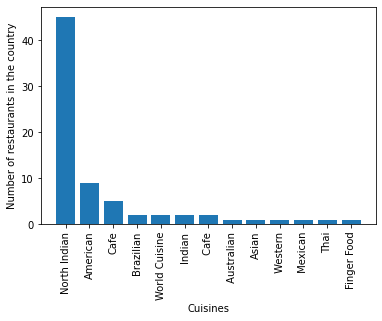

In [54]:
import matplotlib.pyplot as plt
plt.bar(con1['Cuisines'],con1['Number of restaurants in the country'])

plt.xlabel("Cuisines")
plt.ylabel("Number of restaurants in the country")
plt.xticks(rotation=90)

#con1.plot(kind='bar')

In [56]:
rest_cuisine = pd.DataFrame(df_cuisines[['Restaurant Name','City','Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4',
                                         'Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']])
rest_cuisine_stack=pd.DataFrame(rest_cuisine.stack()) #stacking the columns 
rest_cuisine.head()

,Restaurant Name,City,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
4,Avec Moi Restaurant and Bar,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
6,Onokabe,Tangerang,Indonesian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MONKS,Jakarta,Western,Asian,Cafe,NaN,NaN,NaN,NaN,NaN
10,OJJU,Jakarta,Korean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Noah's Barn Coffeenery,Bandung,Cafe,Coffee and Tea,Western,NaN,NaN,NaN,NaN,NaN


In [57]:
keys1 = [c for c in rest_cuisine  if c.startswith('Cuisine')]
b=pd.melt(rest_cuisine, id_vars='Restaurant Name', value_vars=keys, value_name='Cuisines') 
#melting the stack into one row
max_rate1=pd.DataFrame(b.groupby(by=['Restaurant Name','variable','Cuisines']).size().reset_index()) 
#find the highest restuarant in the city
max_rate1
del max_rate1['variable']
max_rate1.columns=['Restaurant Name','Cuisines','Count']
max_rate1.head(10)

,Restaurant Name,Cuisines,Count
0,12212,Fast Food,1
1,Let's Burrrp,Chinese,1
2,Let's Burrrp,North Indian,1
3,#45,Cafe,1
4,#Dilliwaala6,North Indian,1
5,#InstaFreeze,Ice Cream,1
6,#Urban CafÌ©,North Indian,1
7,#Urban CafÌ©,Chinese,1
8,#Urban CafÌ©,Italian,1
9,#hashtag,Cafe,1


In [58]:
max_rate1.sort_values('Count',ascending=False)
#Cafe Coffee Day has the max number of cuisines and The least number of cuisines in a resaurant is 1.

,Restaurant Name,Cuisines,Count
2139,Cafe Coffee Day,Cafe,82
4031,Domino's Pizza,Pizza,73
4032,Domino's Pizza,Fast Food,72
11200,Subway,Healthy Food,59
11199,Subway,Salad,59
...,...,...,...
4775,Frontier - The Ashok,North Indian,1
4776,Frontier - The Ashok,Mughlai,1
4777,Frontier Restaurant,North Indian,1
4778,Frontier Restaurant,Chinese,1


In [59]:
rating = merged1[['Restaurant ID','Restaurant Name','Country','City','Aggregate rating','Average Cost for two','Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']]

In [61]:
rating = rating.merge(max_rate1,left_on='Restaurant Name',right_on='Restaurant Name',how='left')
rating

,Restaurant ID,Restaurant Name,Country,City,Aggregate rating,Average Cost for two,Votes,Price range,Has Table booking_Yes,Has Online delivery_Yes,Cuisines,Count
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,NaN,NaN
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3,0,0,NaN,NaN
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3,0,0,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3,0,0,French,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21975,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Italian,1.0
21976,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,0,0,Beverages,1.0
21977,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,0,0,Street Food,1.0
21978,18246202,VNS Live Studio,India,Varanasi,3.5,0,109,1,0,0,Chinese,1.0


In [62]:
merged1.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes
Restaurant ID,1.000000,0.148447,-0.226073,-0.052111,-0.001696,-0.134419,-0.326144,-0.146895,-0.110118,-0.085157
Country Code,0.148447,1.000000,-0.698298,0.019784,0.043224,0.243393,0.282234,0.154593,-0.061695,-0.154627
Longitude,-0.226073,-0.698298,1.000000,0.043213,0.045892,-0.078974,-0.116843,-0.085141,0.100497,0.178773
Latitude,-0.052111,0.019784,0.043213,1.000000,-0.111089,-0.166668,0.000541,-0.022927,0.054648,0.118709
Average Cost for two,-0.001696,0.043224,0.045892,-0.111089,1.000000,0.075093,0.051797,0.067794,0.007757,-0.018976
Price range,-0.134419,0.243393,-0.078974,-0.166668,0.075093,1.000000,0.437874,0.309308,0.502025,0.078007
Aggregate rating,-0.326144,0.282234,-0.116843,0.000541,0.051797,0.437874,1.000000,0.313598,0.190045,0.225772
Votes,-0.146895,0.154593,-0.085141,-0.022927,0.067794,0.309308,0.313598,1.000000,0.169497,0.074399
Has Table booking_Yes,-0.110118,-0.061695,0.100497,0.054648,0.007757,0.502025,0.190045,0.169497,1.000000,0.101204
Has Online delivery_Yes,-0.085157,-0.154627,0.178773,0.118709,-0.018976,0.078007,0.225772,0.074399,0.101204,1.000000


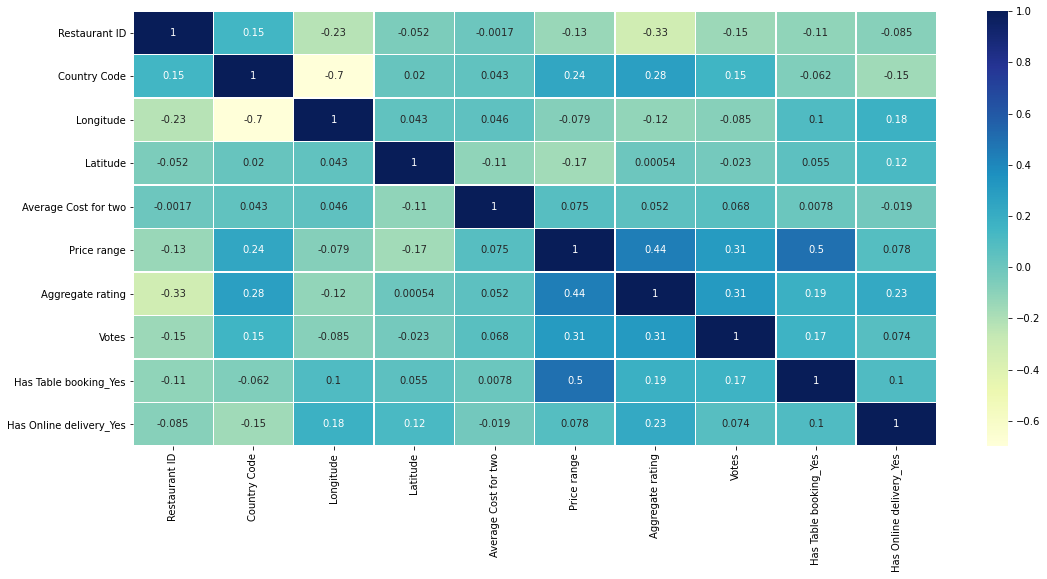

In [63]:
fig, ax = plt.subplots(figsize=(18,8))
dataplot = sns.heatmap(merged1.corr(), cmap="YlGnBu", annot=True,linewidth=0.5,ax=ax)
#heat = merged1.pivot("Average_Cost_for_two", "Aggregate_rating")
#ax = sns.heatmap(heat, annot=True, fmt="d")

We see that there is no single variable that affects the rating strongly, however table booking,online delivery,avg price for two and price range, number of votes do play a part in affecting the rating of a restaurant.